Object classification for self-driving cars

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 10

In [4]:
path = '/home/riya/datasets/road_object_classification/train'


In [5]:
!ls $path

animal	car  models  pedestrian


In [6]:
fnames = get_image_files(os.path.join(path,'animal'))
fnames[:5]

[PosixPath('/home/riya/datasets/road_object_classification/train/animal/tmg-article_tall;jpeg_quality=20.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/1000-road-toll-01.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/Dead-Bear-on-I-70-near-Eagle-credit-Shane-Macomber-Vail-Daily.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/domestic-animals-on-road.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/index.jpeg')]

In [7]:
data = ImageDataBunch.from_folder('/home/riya/datasets/road_object_classification/train', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(),bs=bs,size=224,num_workers=4).normalize(imagenet_stats)


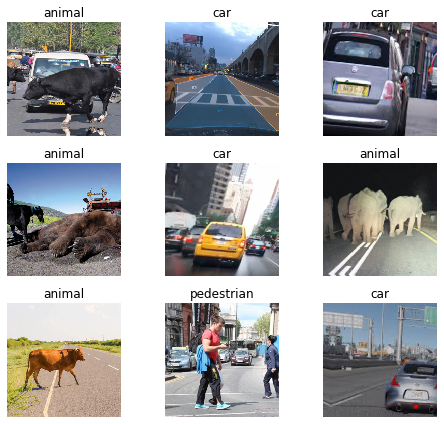

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes)
len(data.classes),data.c

['animal', 'car', 'pedestrian']


(3, 3)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [11]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [12]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.825970,1.862238,0.454545,00:11
1,1.213702,1.114761,0.181818,00:13
2,0.877271,1.018795,0.090909,00:11
3,0.637662,0.886793,0.090909,00:10
4,0.517723,0.939835,0.090909,00:10
5,0.418985,1.089951,0.272727,00:10


In [ ]:
learn.save('stage-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

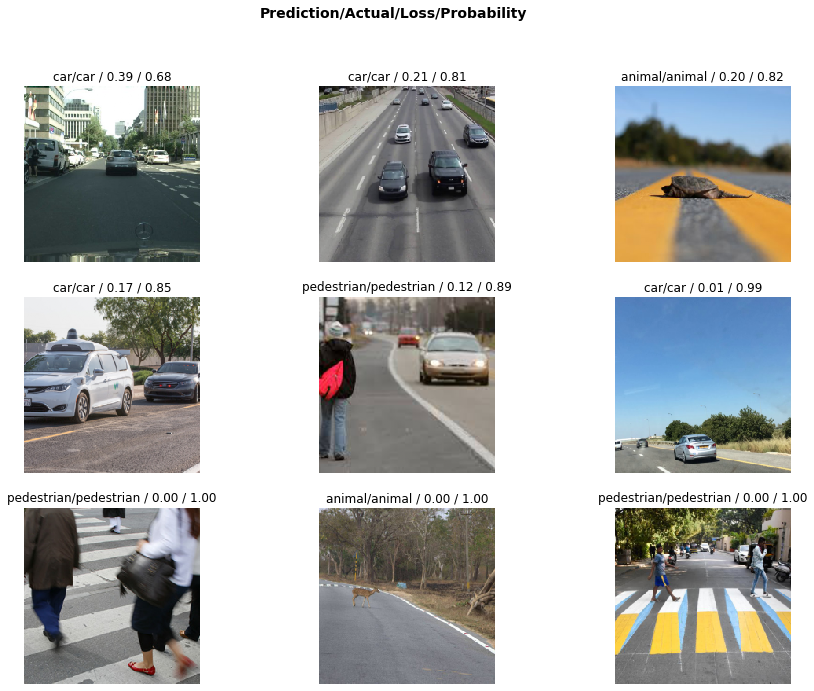

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

In [16]:
doc(interp.plot_top_losses)

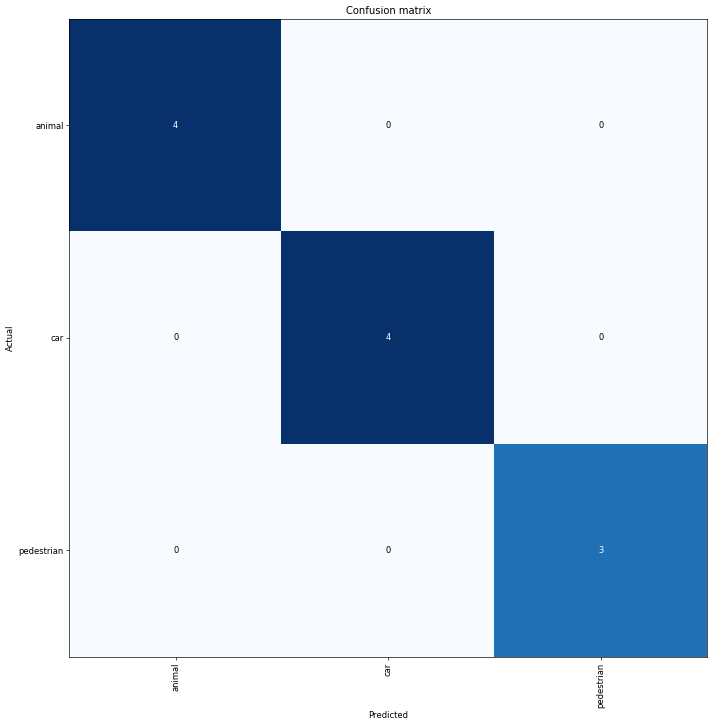

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [18]:
interp.most_confused(min_val=2)

[]

In [19]:
learn.unfreeze()

In [20]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.374960,0.264738,0.181818,00:13


That's a pretty accurate model!

In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [23]:
learn.unfreeze()

In [24]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.486631,0.299197,0.181818,00:13
1,0.330678,0.239244,0.181818,00:13
2,0.352835,0.256065,0.181818,00:13
3,0.321760,0.254485,0.181818,00:14


In [25]:
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,1.196330,0.021008,0.000000,00:13
